             Name                                        Description  \
0           Jeans  The Jeans is a high-quality item in the Clothi...   
1           Socks  The Socks is a high-quality item in the Clothi...   
2            Eggs  The Eggs is a high-quality item in the Groceri...   
3          Gloves  The Gloves is a high-quality item in the Cloth...   
4  Stuffed Animal  The Stuffed Animal is a high-quality item in t...   
5         Mystery  The Mystery is a high-quality item in the Book...   
6             Hat  The Hat is a high-quality item in the Clothing...   
7         Chicken  The Chicken is a high-quality item in the Groc...   
8            Eggs  The Eggs is a high-quality item in the Groceri...   
9         Toy Car  The Toy Car is a high-quality item in the Toys...   

   Price($)   Category  
0     44.45   Clothing  
1     38.47   Clothing  
2      5.65  Groceries  
3     79.12   Clothing  
4     76.87       Toys  
5     20.36      Books  
6     45.99   Clothing  
7      

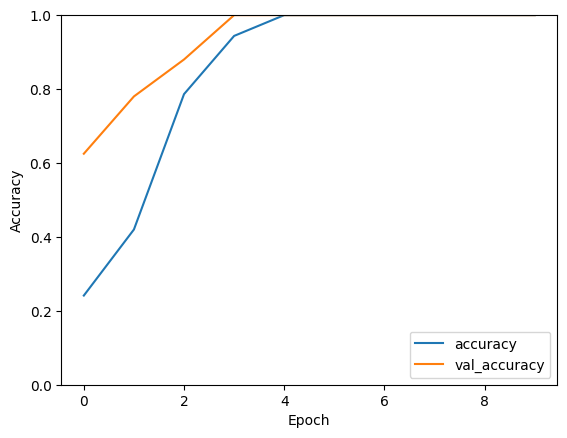

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/dummy_products_1000_unique_descriptions.csv'
data = pd.read_csv(file_path)
print(data.head(10))

# Tokenize text attributes
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Description'])
sequences = tokenizer.texts_to_sequences(data['Description'])
padded_sequences = pad_sequences(sequences, padding='post')

# Encode categorical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=5000, output_dim=64, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()